# Regression lineaire et multilineaire Ridge et Lasso

### Author:  Ricardo Vallejo

## 1. Load Data

In [5]:
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np

diabetes = datasets.load_diabetes();
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:

print("Data shape (predicteurs):" , diabetes.data.shape)
print("Target shape (cible):" , diabetes.target.shape)



In [17]:
print("DATA: \n", diabetes.data[:5,:10])
print("Target: \n", diabetes.target[:5,])
print("Min Max Target: \n" ,min(diabetes.target), max(diabetes.target))

DATA: 
 [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
Target: 
 [151.  75. 141. 206. 135.]
Min Max Target: 
 25.0 346.0


In [19]:
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]


diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]
print(diabetes_X_train[:5,])



[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [21]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
print(diabetes_y_train[:5,])


[151.  75. 141. 206. 135.]


In [25]:
regression = linear_model.LinearRegression()
regression.fit(diabetes_X_train, diabetes_y_train)
print("coef de model:\n", regression.coef_)
print("Intercept model: \n", regression.intercept_)



coef de model:
 [938.23786125]
Intercept model: 
 152.91886182616167


In [26]:
#Error RSS
print("Error RSS: \n ", np.mean((regression.predict(diabetes_X_test) - diabetes_y_test)**2))


Error RSS: 
  2548.0723987259703


<function matplotlib.pyplot.show(*args, **kw)>

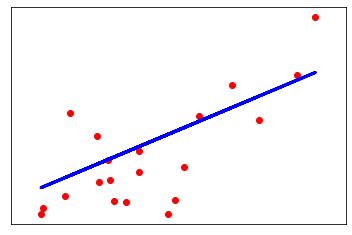

In [28]:
#Predicition

import matplotlib.pyplot as plt
%matplotlib inline

def Yy(m, b, x):
    return m*x + b;

Xmodel = range(1000,6000, 100)
Ymodel = Yy(results.coef_, results.intercept_,  Xmodel)

plt.figure(figsize=(8, 6))
plt.plot(Xmodel, Yy(results.coef_, results.intercept_,  Xmodel), 'b-', label='Model')
plt.plot(tit['cylindree'], tit['puissance'], 'r.', label='Real samples')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Puissance")
plt.xlabel("Cylindree")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.show()


In [29]:
# Explained variance score: 1  prediction parfaite
print('Variance score: %.2f' % regression.score(diabetes_X_test, diabetes_y_test))


Variance score: 0.47


In [32]:
#Another form avec Ride autre form de ionimisation

from sklearn.linear_model import Ridge

model = Ridge()
regression2 = model.fit(diabetes_X_train, diabetes_y_train)
print("coef de model:\n", regression2.coef_)
print("Intercept model: \n", regression2.intercept_)



coef de model:
 [458.48859467]
Intercept model: 
 153.14573767340872


In [33]:
# Explained variance score: 1  prediction parfaite
print('Variance score: %.2f' % regression2.score(diabetes_X_test, diabetes_y_test))

Variance score: 0.25


# Multilineaire

In [35]:
boston = datasets.load_boston();

print(boston.feature_names)
print("Data shape (predicteurs):" , boston.data.shape)
print("Target shape (cible):" , boston.target.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Data shape (predicteurs): (506, 13)
Target shape (cible): (506,)


In [ ]:
print("DATA: \n", boston.data[:5,:10])
print("Target: \n", boston.target[:5,])
print("Min Max Mean Target: \n" ,min(boston.target), max(boston.target), mean(boston.target))

In [40]:
# Décomposer les données prédicteurs en training/testing  
#ensemble apprentissage et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(boston.data, boston.target, test_size=0.25, random_state=33)

# Effectuer un scaling approprié autour de la moyenne et variance
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

# Décomposer les cibles-targets en training/testing  

X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.reshape(-1, 1))

X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1, 1))



In [53]:
# Créer l'objet linear regression  
#On utilise dans la manipulation: SGRegressor
#https://scikit-learn.org/stable/modules/sgd.html

from sklearn import linear_model
from sklearn.utils import column_or_1d
from sklearn.model_selection import  KFold, cross_val_score

#Used for BIG DATE size - https://scikit-learn.org/stable/modules/sgd.html
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=42) #Stochastic Gradient Descent 

# Faire apprendre le model en utilisant les training set
clf_sgd.fit(X_train, y_train.ravel())  #ravel pass to array all elements of y_train


# Affichage des coefficient
print('Coefficients du modele: \n', clf_sgd.coef_)
print('Intercept du modele: \n', clf_sgd.intercept_)
print ("Coefficient de determination sur échantillon apprentissage:",clf_sgd.score(X_train, y_train))

# mean square error
print("Residual sum of squares: %.2f" % np.mean((clf_sgd.predict(X_test) - y_test) ** 2))

#mesurer la performance
from sklearn import metrics
y_pred = clf_sgd.predict(X_test)
print ("Coefficient de determination:{0:.3f}".format( metrics.r2_score(y_test, y_pred)))

import matplotlib.pyplot as plt
y_pred = clf_sgd.predict(X_test)
#on recouvre les valeurs par inversion de valeurs
print("Valeurs test")
print(scalery.inverse_transform(y_test[:20].ravel()))
print("Valeurs predictions")
print(scalery.inverse_transform(y_pred[:20]))


Coefficients du modele: 
 [-0.10270486  0.09745246 -0.03757737  0.0981797  -0.12500087  0.34856003
 -0.02949558 -0.27259783  0.13212947 -0.08500994 -0.19865895  0.0552727
 -0.40025048]
Intercept du modele: 
 [1.52473366e-05]
Coefficient de determination sur échantillon apprentissage: 0.7504778181232461
Residual sum of squares: 1.72
Coefficient de determination:0.664
Valeurs test
[20.5  5.6 13.4 12.6 21.2 19.7 32.4 14.8 33.  21.4 30.1 36.   8.4 21.6
 16.3 23.  14.9 14.1 31.1 11.9]
Valeurs predictions
[18.37348453 10.85074988 13.11697626 18.017555   22.70577607 20.77317816
 36.5369775  15.11113    24.54039093 20.34826664 25.89779479 36.64334344
  5.22691619 25.35829705  9.97128649 24.24991194 17.52213559 18.6971126
 32.67390579 22.39502175]


In [54]:
# créer un iterateur de cross validation k-fold avec k=5  
from sklearn.model_selection import KFold, cross_val_score
#creeer un iterateur de cross validation k-fold avec k=5
cv=KFold(  shuffle=True,n_splits=5, random_state=33)
scores=cross_val_score(clf_sgd,X_train,y_train.ravel(),cv=cv)

print ("Moyenne coefficient de determination avec 5-fold crossvalidation:",np.mean(scores))

Moyenne coefficient de determination avec 5-fold crossvalidation: 0.7100151093068392
